<a href="https://colab.research.google.com/github/gorzanskik-ai/natural-language-processing/blob/main/01_preprocessing/09_text_statistical_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import nltk
nltk.download('shakespeare')
nltk.download('twitter_samples')

[nltk_data] Downloading package shakespeare to /root/nltk_data...
[nltk_data]   Unzipping corpora/shakespeare.zip.
[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

#Letters analysis

Shakespeare

In [5]:
#files shakespeare corpus consists of
shakespeare_file_ids = nltk.corpus.shakespeare.fileids()
shakespeare_file_ids

['a_and_c.xml',
 'dream.xml',
 'hamlet.xml',
 'j_caesar.xml',
 'macbeth.xml',
 'merchant.xml',
 'othello.xml',
 'r_and_j.xml']

In [6]:
' '.join(nltk.corpus.shakespeare.words(shakespeare_file_ids[0]))

"The Tragedy of Antony and Cleopatra Dramatis Personae MARK ANTONY OCTAVIUS CAESAR M . AEMILIUS LEPIDUS triumvirs . SEXTUS POMPEIUS DOMITIUS ENOBARBUS VENTIDIUS EROS SCARUS DERCETAS DEMETRIUS PHILO friends to Antony . MECAENAS AGRIPPA DOLABELLA PROCULEIUS THYREUS GALLUS MENAS friends to Caesar . MENECRATES VARRIUS friends to Pompey . TAURUS , lieutenant - general to Caesar . CANIDIUS , lieutenant - general to Antony . SILIUS , an officer in Ventidius ' s army . EUPHRONIUS , an ambassador from Antony to Caesar . ALEXAS MARDIAN , a Eunuch . SELEUCUS DIOMEDES attendants on Cleopatra . A Soothsayer . A Clown . CLEOPATRA , queen of Egypt . OCTAVIA , sister to Caesar and wife to Antony . CHARMIAN IRAS attendants on Cleopatra . Officers , Soldiers , Messengers , and other Attendants . SCENE In several parts of the Roman empire . ANTONY AND CLEOPATRA ACT I SCENE I . Alexandria . A room in CLEOPATRA ' s palace . Enter DEMETRIUS and PHILO PHILO Nay , but this dotage of our general ' s O ' erflow

In [7]:
from collections import Counter, OrderedDict

In [8]:
shakespeare_texts = [' '.join(nltk.corpus.shakespeare.words(file)).lower() for file in shakespeare_file_ids]
all_text = ''.join(shakespeare_texts)

letter_counter = Counter(all_text)
letter_counter.most_common(5)

[(' ', 240569), ('e', 95070), ('t', 71536), ('o', 67305), ('a', 63363)]

In [9]:
import pandas as pd

In [10]:
df_s = pd.DataFrame({'letter': letter_counter.keys(), 'frequency': letter_counter.values()})
df_s['frequency'] = df_s['frequency'] / sum(df_s['frequency'])
df_s.head()

,letter,frequency
0,t,0.065778
1,h,0.046200
2,e,0.087418
3,,0.221207
4,r,0.044046


<Axes: title={'center': 'Shakespeare'}, xlabel='letter'>

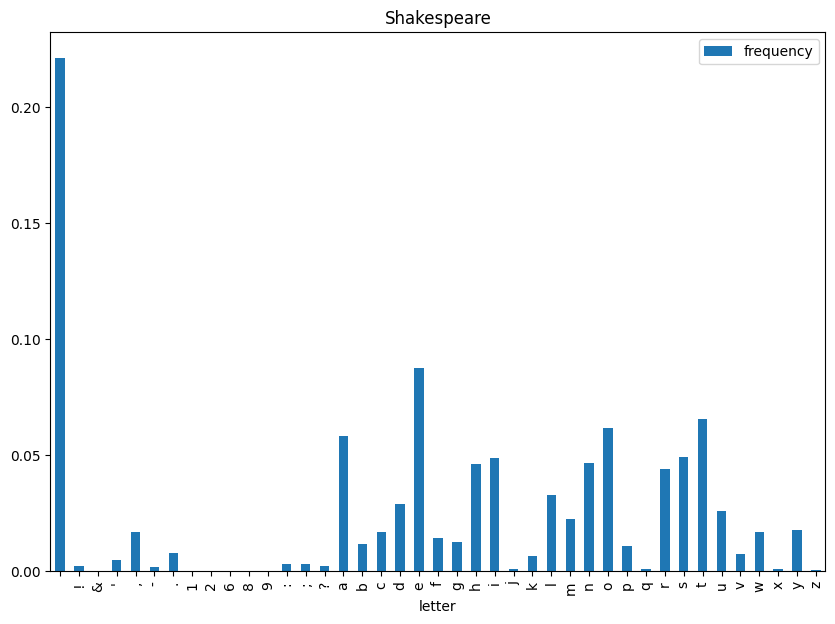

In [11]:
df_s.sort_values('letter').plot.bar(x='letter', y='frequency', figsize=(10, 7), title='Shakespeare')

Twitter

In [12]:
twitter_file_ids = nltk.corpus.twitter_samples.fileids()
twitter_file_ids

['negative_tweets.json', 'positive_tweets.json', 'tweets.20150430-223406.json']

In [13]:
twitter_texts = [' '.join(nltk.corpus.twitter_samples.strings(file)).lower() for file in twitter_file_ids]
all_text = ''.join(twitter_texts)

letter_counter = Counter(all_text)
letter_counter.most_common(5)

[(' ', 498539), ('e', 238225), ('t', 228380), ('o', 185941), ('a', 183126)]

In [14]:
df_t = pd.DataFrame({'letter': letter_counter.keys(), 'frequency': letter_counter.values()})
df_t['frequency'] = df_t['frequency'] / sum(df_t['frequency'])
df_t.head()

,letter,frequency
0,h,0.032082
1,o,0.059110
2,p,0.021092
3,e,0.075731
4,l,0.036045


<Axes: title={'center': 'Twitter'}, xlabel='letter'>

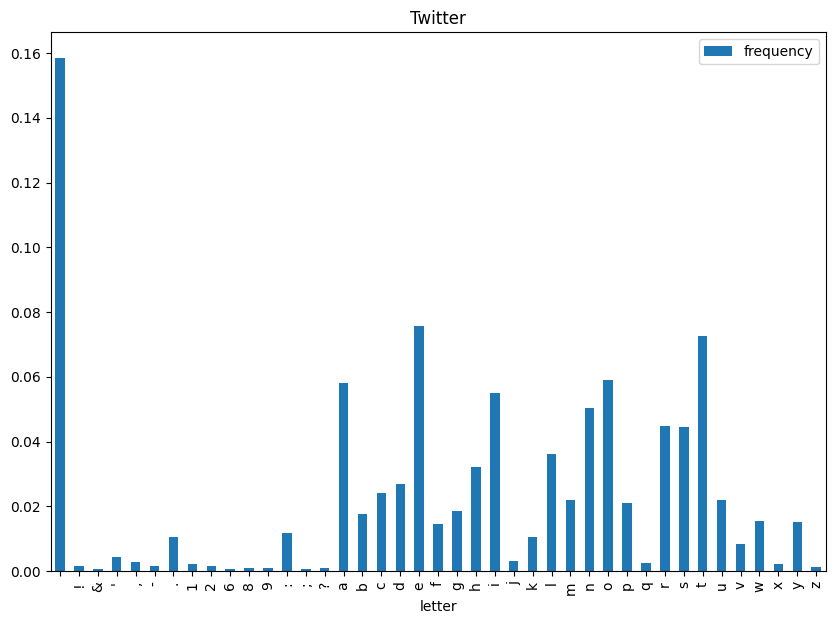

In [15]:
df_t[df_t['letter'].isin(df_s['letter'])].sort_values('letter').plot.bar(x='letter', y='frequency', figsize=(10, 7), title='Twitter')

In [16]:
common_df = df_s.rename(columns={'frequency': 'shakespeare'}).merge(df_t.rename(columns={'frequency': 'twitter'}),
           how='left', left_on='letter', right_on='letter')
common_df['shakespeare'] /= common_df['shakespeare'].sum()
common_df['twitter'] /= common_df['twitter'].sum()
common_df.sample(n=5)

,letter,shakespeare,twitter
37,9,0.000008,0.000956
24,",",0.017089,0.003097
4,r,0.044046,0.046819
12,c,0.016918,0.025415
28,q,0.000759,0.002699


<Axes: title={'center': 'Shakespeare vs Twitter'}, xlabel='letter'>

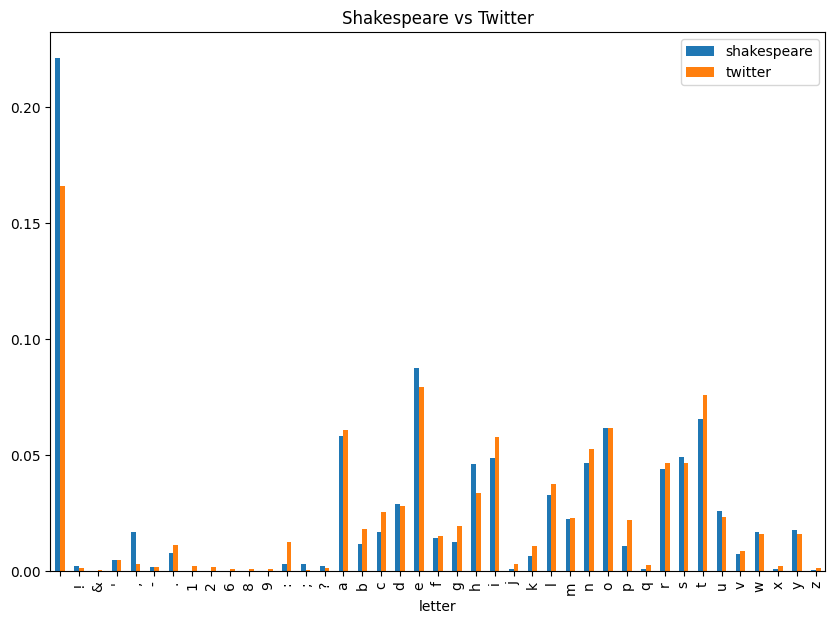

In [17]:
common_df.sort_values('letter').plot.bar(x='letter', y=['shakespeare', 'twitter'], figsize=(10, 7), title='Shakespeare vs Twitter')

#Words

In [18]:
import wordcloud
import matplotlib.pyplot as plt

In [21]:
word_counters = {filename: Counter(map(str.lower, nltk.corpus.shakespeare.words(filename))) for filename in shakespeare_file_ids}

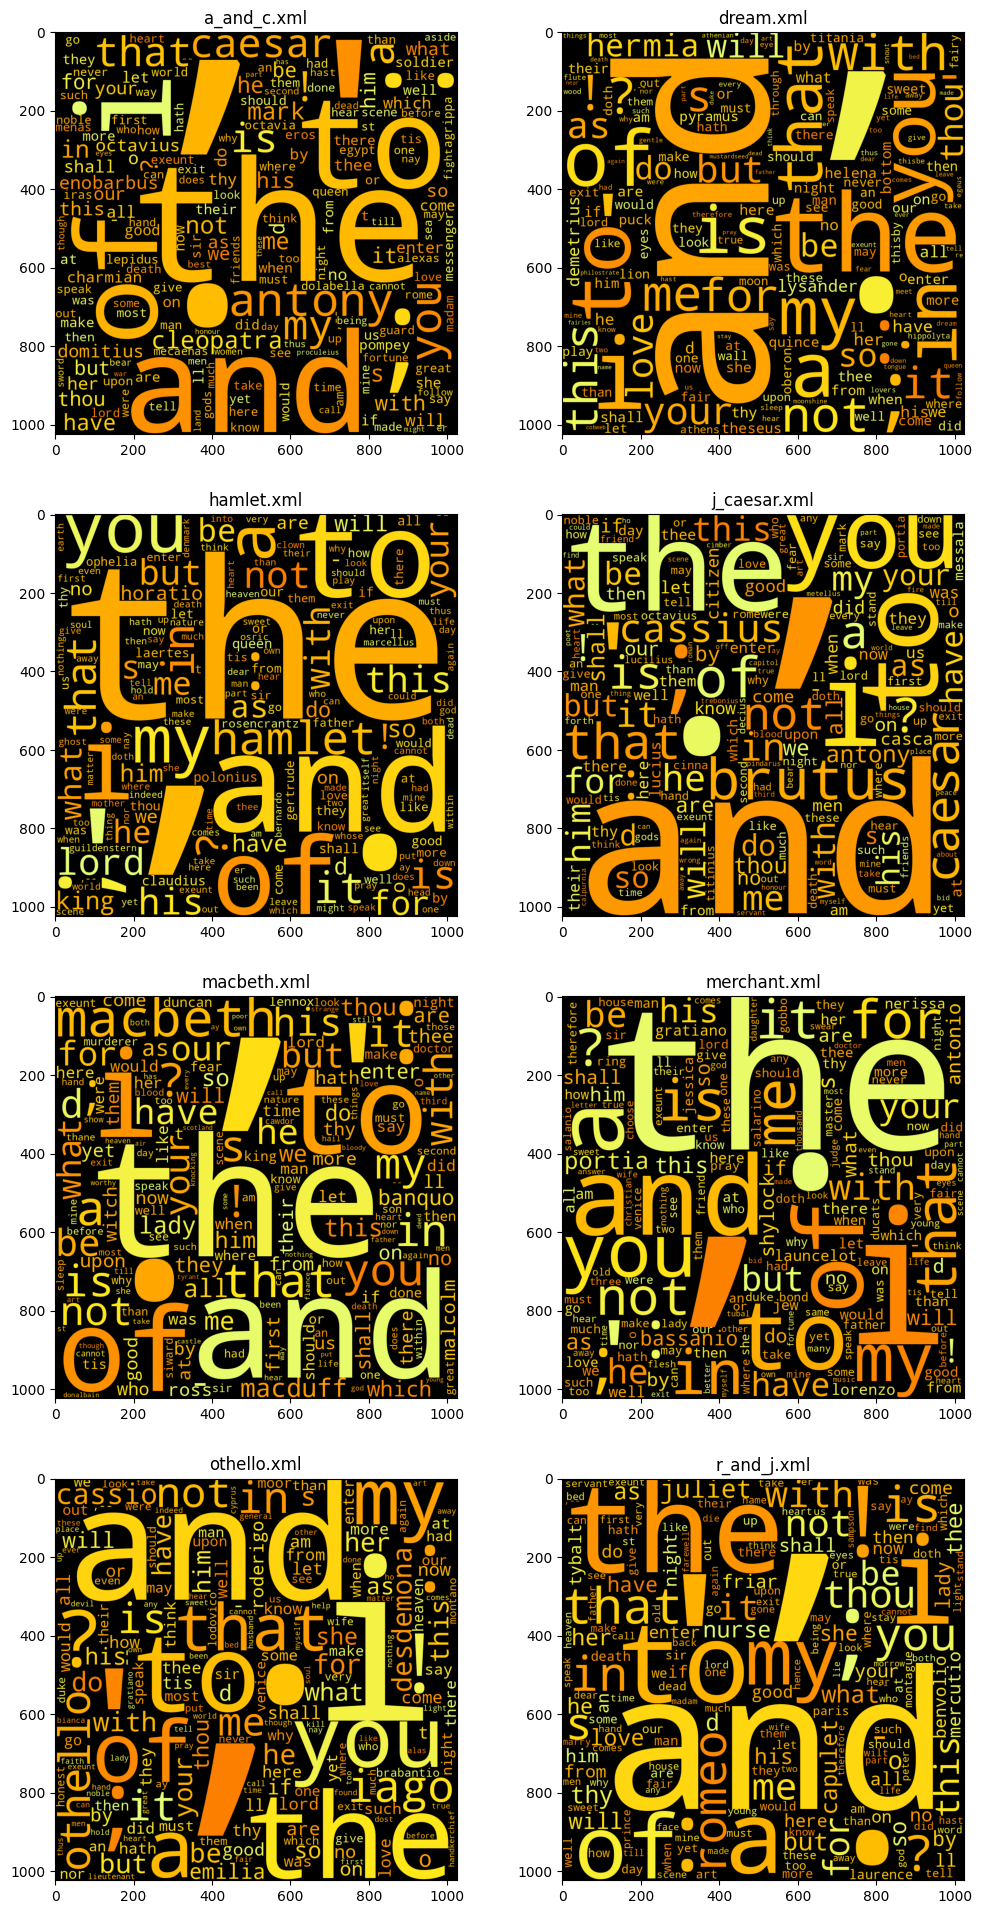

In [25]:
fig, axes = plt.subplots(4, 2, figsize=(12, 24))
for (filename, counter), ax in zip(word_counters.items(), axes.flatten()):
    word_cloud = wordcloud.WordCloud(width=1024,
                                     height=1024,
                                     colormap="Wistia").fit_words(counter)
    ax.set_title(filename)
    ax.imshow(word_cloud)

In [23]:
global_counter = Counter()

for counter in word_counters.values():
    global_counter += counter

global_counter.most_common(10)

[(',', 18315),
 ('.', 8247),
 ('the', 6210),
 ('and', 5549),
 ("'", 5229),
 ('i', 4849),
 ('to', 4239),
 (';', 3553),
 ('of', 3439),
 (':', 3241)]

In [24]:
N_MAX = 1000

common_global_counter = Counter(dict(global_counter.most_common(N_MAX)))

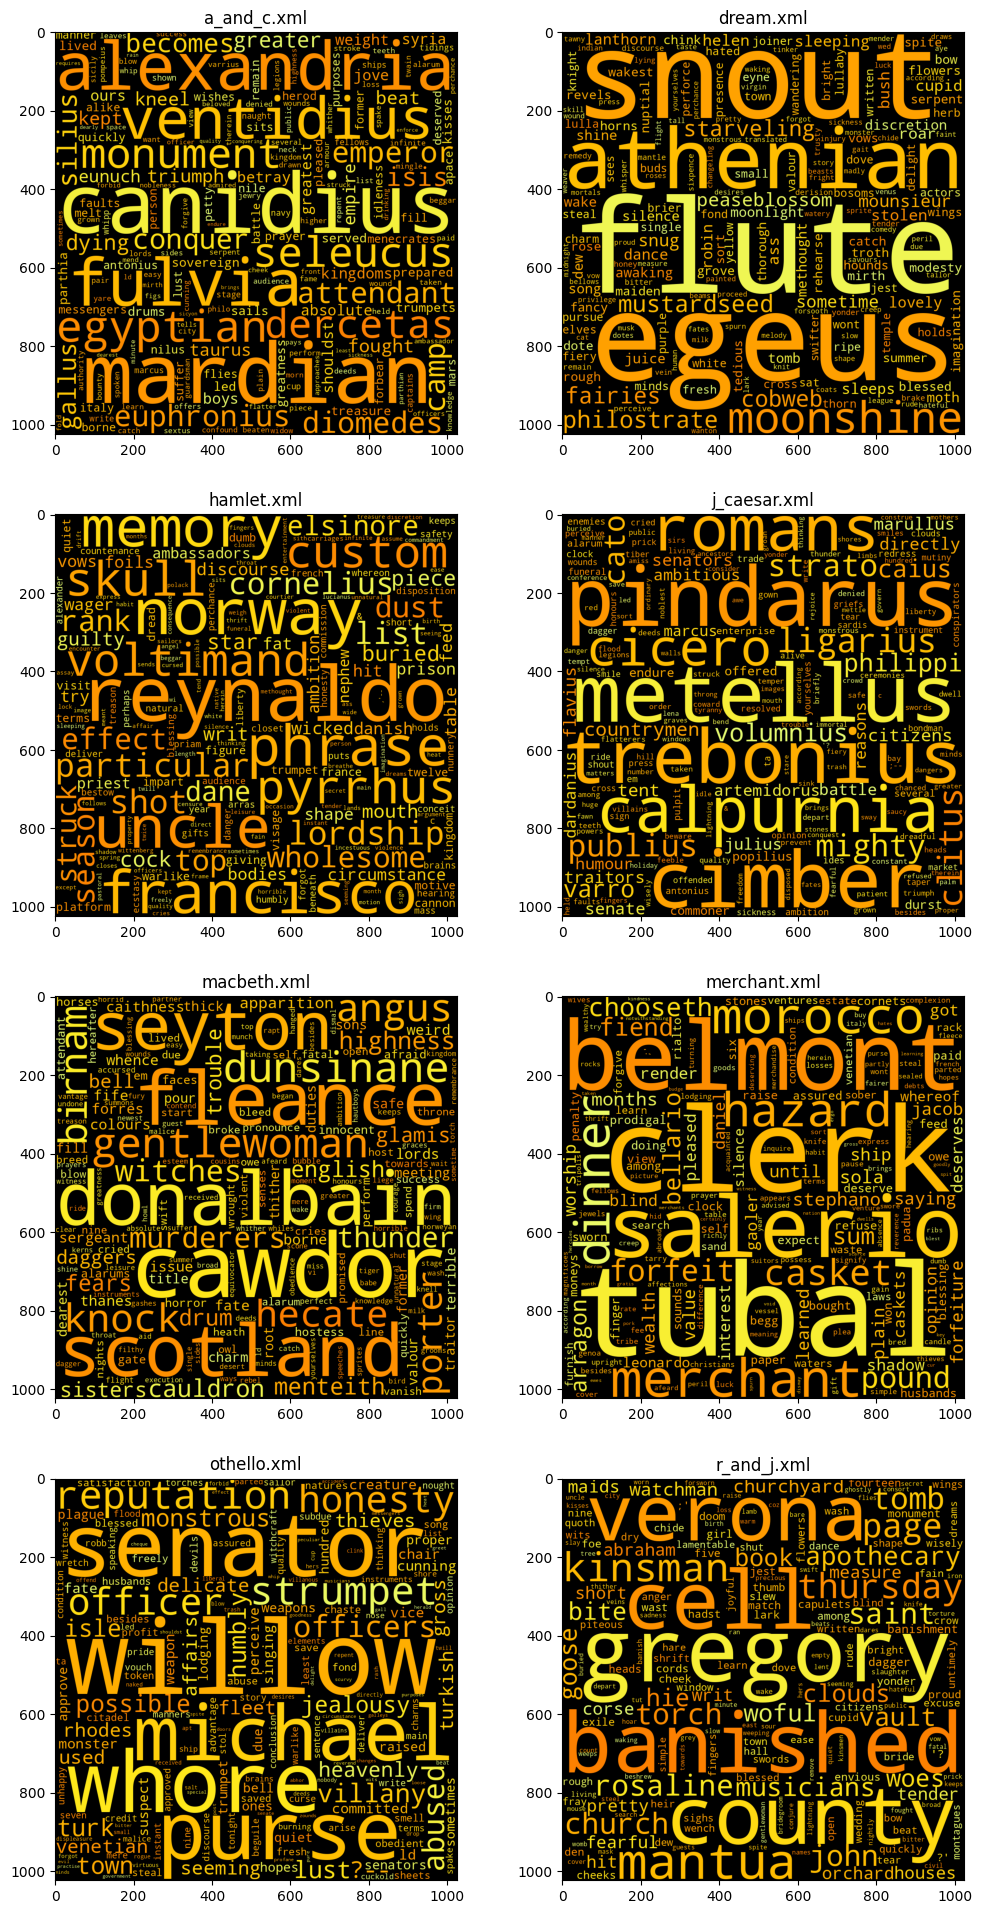

In [26]:
fig, axes = plt.subplots(4, 2, figsize=(12, 24))
for (filename, counter), ax in zip(word_counters.items(), axes.flatten()):
    counter_diff = \
        Counter({k: v for k, v in counter.most_common(N_MAX)
                 if k not in common_global_counter})
    word_cloud = wordcloud.WordCloud(width=1024,
                                     height=1024,
                                     colormap="Wistia").fit_words(counter_diff)
    ax.set_title(filename)
    ax.imshow(word_cloud)

#N-gram analysis

In [28]:
from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder

In [29]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()

In [30]:
for filename in shakespeare_file_ids:
    # Finding 2-grams
    bigram_finder = BigramCollocationFinder.from_words(nltk.corpus.shakespeare.words(filename))
    bigram_finder.apply_freq_filter(3)
    # Finding 3-grams
    trigram_finder = TrigramCollocationFinder.from_words(nltk.corpus.shakespeare.words(filename))
    trigram_finder.apply_freq_filter(3)

    print(
        f"{filename}:",
        "\nbigrams:",
        bigram_finder.nbest(bigram_measures.likelihood_ratio, 10),
        "\ntrigrams:",
        trigram_finder.nbest(trigram_measures.likelihood_ratio, 10),
        "\n"
    )

a_and_c.xml: 
bigrams: [('MARK', 'ANTONY'), ("'", 's'), ('DOMITIUS', 'ENOBARBUS'), ('OCTAVIUS', 'CAESAR'), ("'", 'd'), ('.', 'CLEOPATRA'), ("'", 'll'), ("'", 't'), ('.', 'MARK'), ('.', 'Enter')] 
trigrams: [('.', 'MARK', 'ANTONY'), ('Enter', 'MARK', 'ANTONY'), ('!', 'MARK', 'ANTONY'), ('?', 'MARK', 'ANTONY'), ('MARK', 'ANTONY', 'I'), ('MARK', 'ANTONY', 'Well'), ('MARK', 'ANTONY', 'Now'), ('MARK', 'ANTONY', 'Let'), ('MARK', 'ANTONY', 'You'), (".'", 'MARK', 'ANTONY')] 

dream.xml: 
bigrams: [("'", 's'), ("'", 'd'), ('I', 'am'), ("'", 'll'), (';', 'And'), ('I', 'will'), ('.', 'BOTTOM'), ('.', 'LYSANDER'), ('.', 'THESEUS'), ('.', 'DEMETRIUS')] 
trigrams: [('father', "'", 's'), ("'", 's', 'eyes'), ('Hermia', "'", 's'), ('Thisby', "'", 's'), ('Ninny', "'", 's'), ('Cupid', "'", 's'), ('lion', "'", 's'), ("'", 's', 'tomb'), ("'", 's', 'eye'), ('love', "'", 's')] 

hamlet.xml: 
bigrams: [("'", 's'), ('KING', 'CLAUDIUS'), ("'", 'd'), ('.', 'HAMLET'), ('QUEEN', 'GERTRUDE'), ('my', 'lord'), ('LORD